#  《利用Python进行数据分析》1st Edition chapter 8

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import os

## Figure 和 Subplot

matplotlib API docs: https://matplotlib.org/api/index.html

In [2]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [3]:
ax1 = fig.add_subplot(2, 2, 1)    #图像是 2 * 2的， 并且当前选中4个subplot中的第一个，编号从1开始

In [4]:
ax2 = fig.add_subplot(2, 2, 2)

In [5]:
ax3 = fig.add_subplot(2, 2, 3)

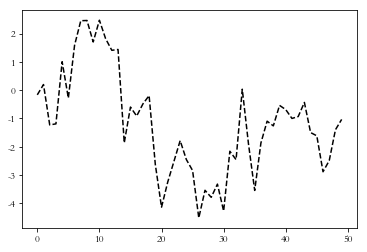

In [6]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [7]:
type(ax3)

matplotlib.axes._subplots.AxesSubplot

In [8]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [9]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

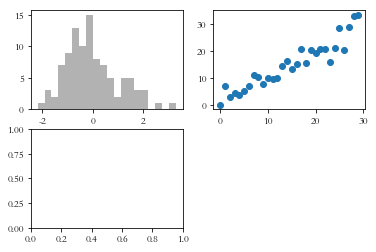

In [10]:
fig

In [11]:
ax3.plot(np.random.randn(50).cumsum(), 'k--')

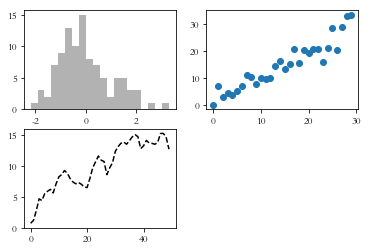

In [12]:
fig

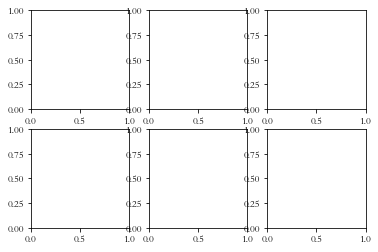

In [13]:
fig, axes = plt.subplots(2, 3)

In [14]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BC27E80>,
      dtype=object)

In [15]:
# 利用 subplots_adjust() 调整subplot之间的间距, 此外该函数还是个顶级函数
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)   # wspace和hspace用于控制宽度和高度的百分比

<Figure size 432x288 with 0 Axes>

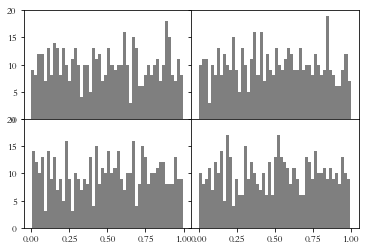

In [16]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.rand(500), bins=50, color='k', alpha=0.5)
        
plt.subplots_adjust(wspace=0, hspace=0)

In [17]:
"""
    u'参数说明'： axes.hist()    -- create a histogram  (直方图)
                bins : int or sequence or str
                color : color or array_like of colors or None, optional
                orientation : {'horizontal', 'vertical'}, optiona
                histtype : {'bar', 'barstacked', 'step', 'stepfilled'}, optional
""" 

"\n    u'\xe5\x8f\x82\xe6\x95\xb0\xe8\xaf\xb4\xe6\x98\x8e'\xef\xbc\x9a axes.hist()    -- create a histogram  (\xe7\x9b\xb4\xe6\x96\xb9\xe5\x9b\xbe)\n                bins : int or sequence or str\n                color : color or array_like of colors or None, optional\n                orientation : {'horizontal', 'vertical'}, optiona\n                histtype : {'bar', 'barstacked', 'step', 'stepfilled'}, optional\n"

In [18]:
from numpy.random import randn

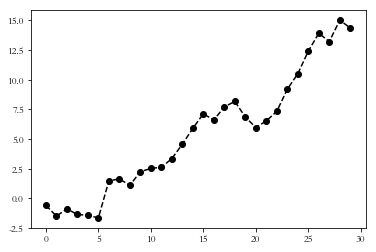

In [19]:
plt.figure()
#fmt 参数的说明详见 https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot 中的Notes section
plt.plot(randn(30).cumsum(), 'ko--')    

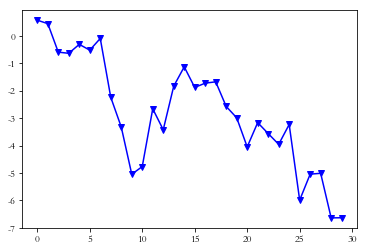

In [20]:
plt.plot(randn(30).cumsum(), 'bv-')     #fmt格式举例： b : blue, v : triangle down  - : solid line

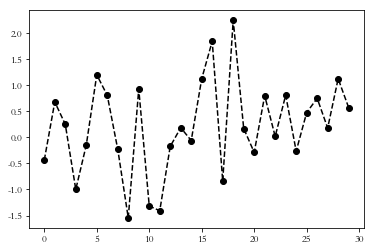

In [21]:
#或者可以将格式更加明确地写出：
plt.plot(randn(30), color='k', linestyle='dashed', marker='o')

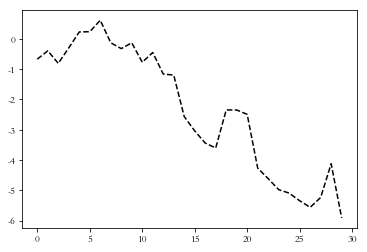

In [22]:
data = randn(30).cumsum()
plt.plot(data, 'k--', label='Default')

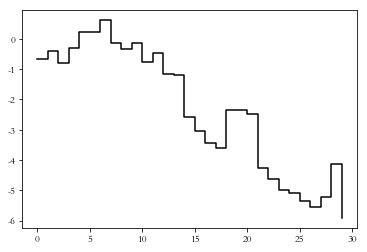

In [23]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

## 刻度、标签 和 图例

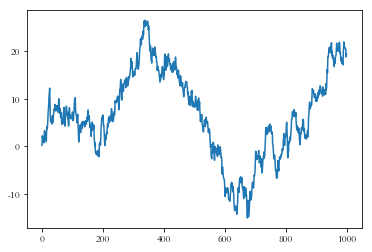

In [24]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())

In [25]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

Text(0.5,3.2,'Stages')

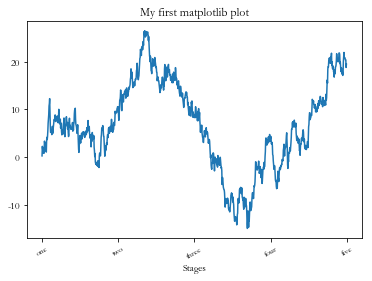

In [26]:
fig

In [27]:
from matplotlib.font_manager import _rebuild
_rebuild()

Text(0.5,0,u'\u9636\u6bb5')

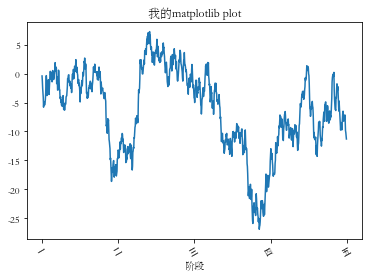

In [28]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels([u'一', u'二', u'三', u'四', u'五'],
                            rotation=30, fontsize='small')
ax.set_title(u'我的matplotlib plot')
ax.set_xlabel(u'阶段')

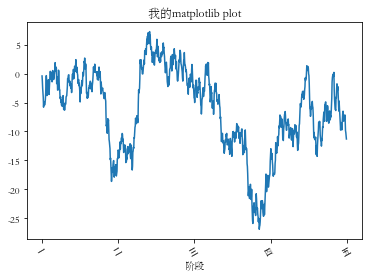

In [29]:
fig

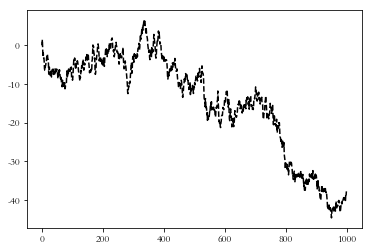

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k--', label='one')

In [33]:
ax.plot(randn(1000).cumsum(), 'k-.', label='two')

In [34]:
ax.plot(randn(1000).cumsum(), 'k.', label='three')

In [35]:
ax.legend(loc='best')    # 创建图例

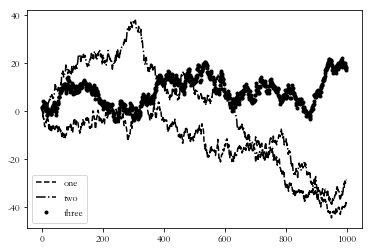

In [36]:
fig

In [40]:
ax.text(600, 30, 'Hello World!', family='monospace', fontsize=12)

Text(600,30,'Hello World!')

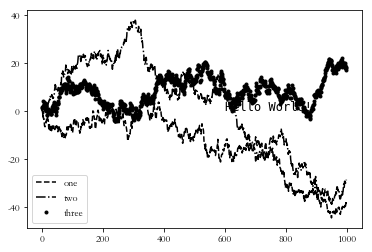

In [39]:
fig

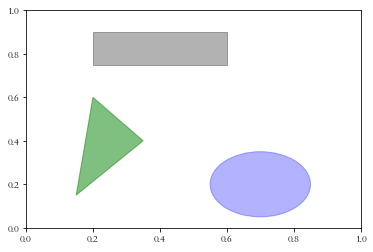

In [41]:
# 绘制图形
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## 将图表保存到文件 

In [42]:
plt.savefig('figpath.svg')

<Figure size 432x288 with 0 Axes>

In [44]:
fig.savefig('figpath.pdf')    #根据文件扩展名推断文件类型

In [46]:
from io import BytesIO
buff = BytesIO()
fig.savefig(buff)
plot_data = buff.getvalue()

## matplotlib 配置

In [48]:
plt.rc('figure', figsize=(10, 10))

In [50]:
# rc 的第一个参数是希望 自定义的对象， 如 ‘figure’, 'axes'， ‘xtick’, 'ytick', 'grid', 'legend'等
font_options = {'family' : 'monospace', 
                'weight' : 'bold', 
                'weight' : 'bold', 
                'size' : '12'}

plt.rc('font', **font_options)

## pandas 中的绘图函数 

In [51]:
plt.close('all')

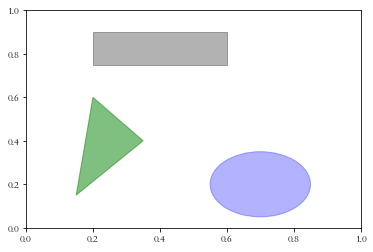

In [52]:
fig

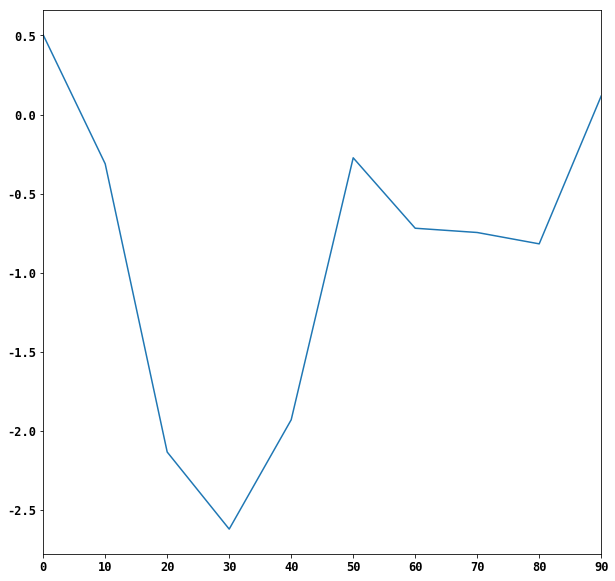

In [53]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()     # 该Series对象的索引会被传给matplotlib, 并用以绘制X轴

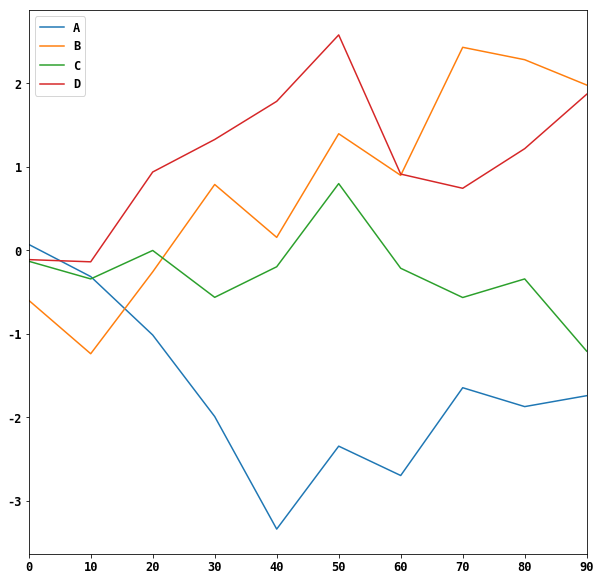

In [54]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df.plot()    # DataFrame 的plot() 方法会在一个subplot中为各列绘制一条线，并自动创建图例

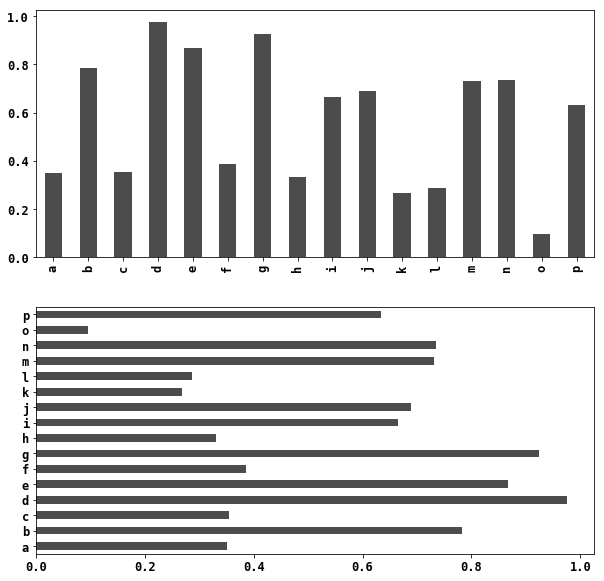

In [57]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

In [61]:
df = DataFrame(np.random.rand(6, 4), index=[u'一', u'二', u'三', u'四', u'五', u'六'],
              columns=pd.Index(['A', 'B', 'C', 'D'], name='Statistic'))
df

Statistic,A,B,C,D
一,0.926031,0.736543,0.391764,0.021150
二,0.573910,0.588314,0.130874,0.693912
三,0.179042,0.084985,0.436898,0.034283
四,0.348056,0.586174,0.991902,0.607896
五,0.674332,0.268223,0.711071,0.755770
六,0.181771,0.692388,0.743299,0.804159


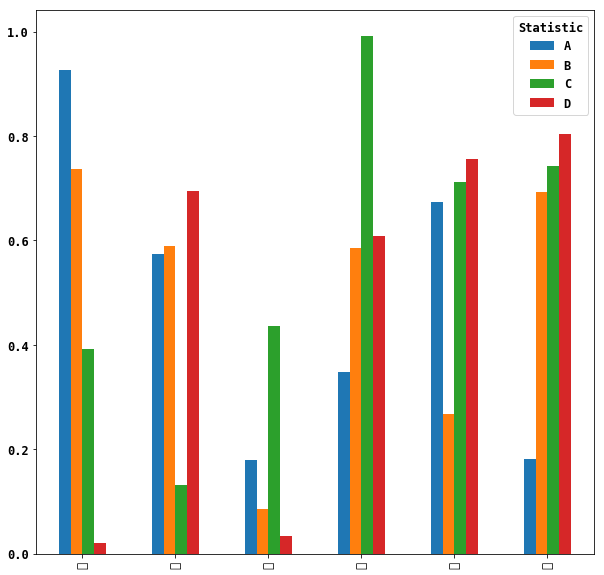

In [62]:
df.plot(kind='bar')

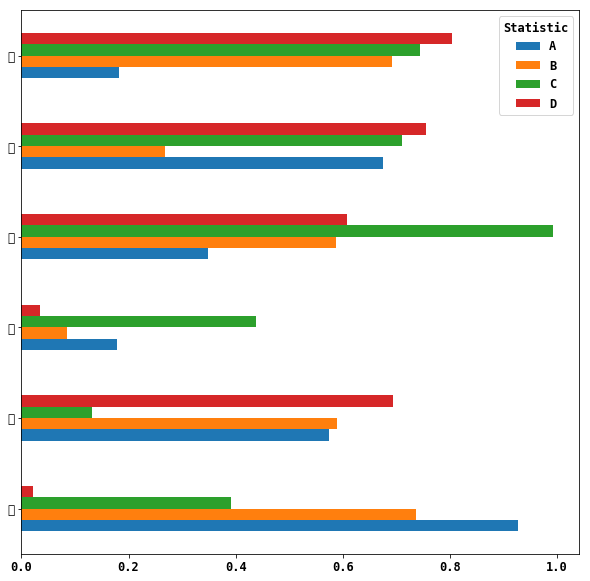

In [64]:
from matplotlib.font_manager import _rebuild
_rebuild()
df.plot(kind='barh')

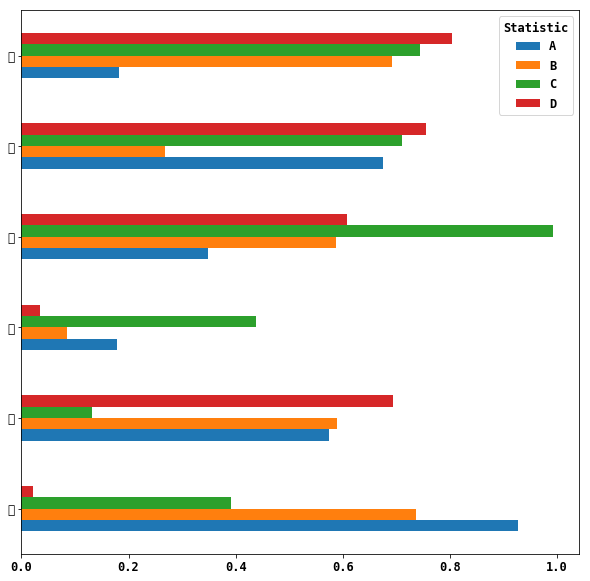

In [66]:
df.plot(kind='barh', stacked=False)

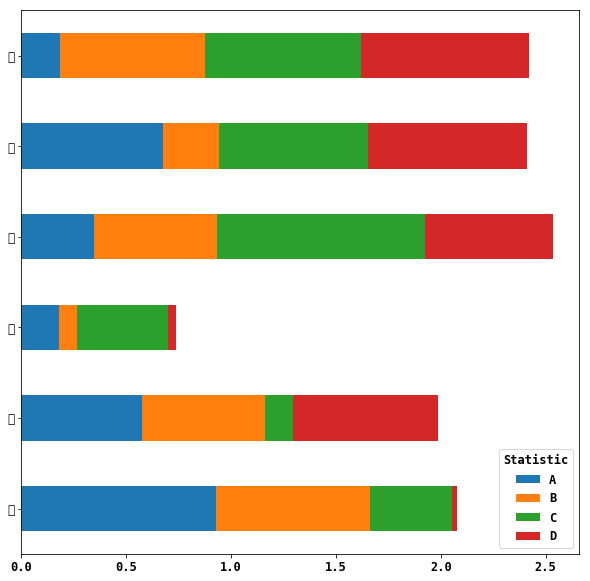

In [67]:
df.plot(kind='barh', stacked=True)

## 直方图和密度图

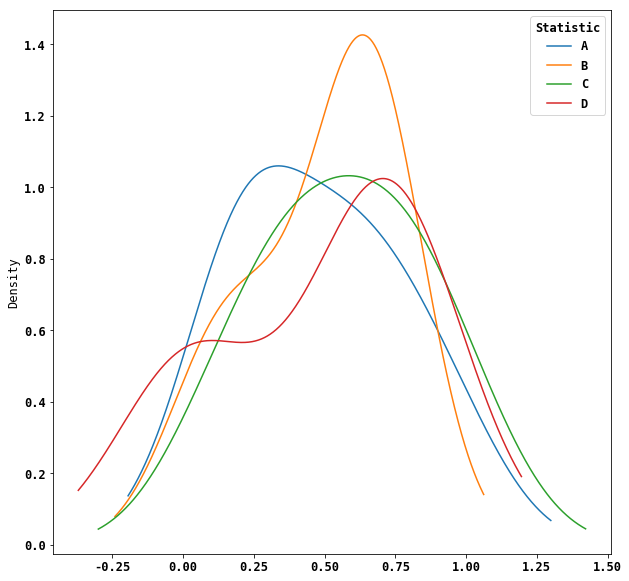

In [68]:
df.plot(kind='kde')

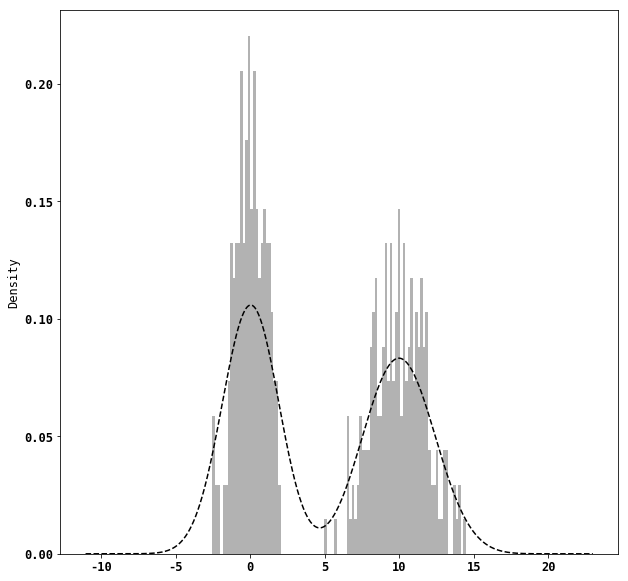

In [70]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='k', density=True)
values.plot(kind='kde', style='k--')